# Wordcloud from .csv frequencies list

Based on Stefan Lasers wordcloud script: https://github.com/LaserSteff/-IchbinHanna/blob/main/code/wordcloud.ipynb

Adapted for using existing frequency counts

.csv file with frequencies must be situated in the same folder as the junyper notbook script.

## Imports

In [9]:
# Importing modules
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
from collections import Counter

In [10]:
# Load additional packages in Jupyter, if required
# !pip3 install nltk

## Get data from .csv
Gets current directory and file in this directory. 
Opens it als pandas csv reader. Deletes emty lines and then writes dataframe into dictionary, which is needed by wordcloud.

In [11]:
directory = os.getcwd()
filepath = str(directory) + "/preliminary_names_freq.csv" # Change file-name here if necessary

with open(filepath, newline="") as csvfile:
    names_reader = pd.read_csv(csvfile, encoding="utf-8", dtype="unicode")
    names_reader[['word']].fillna(0)

data = dict(zip(names_reader["word"].tolist(), names_reader["freq"].astype("int").tolist())) # Creates dictionary necessary for wordcloud

## Create and save/show wordcloud

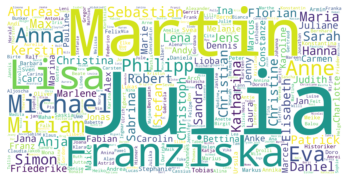

In [12]:
wordcloud = WordCloud(background_color="white", min_word_length = 3, relative_scaling=0.5,
                      collocations=False, max_words=360, contour_width=0, contour_color='steelblue',
                      width=2000, height=1000).generate_from_frequencies(data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plotpath = str(directory) + "/wordcloud_names.png"
plt.savefig(plotpath, dpi=300)
plt.show()